# <font color = 'orange'> Model Training

---

## <font color='blue'> 1. Imporing libraries and loading dataset

In [1]:
# importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


---

## <font color='blue'> 2. Separating independent and dependent features.

In [3]:
# independent features
x = df.drop('math_score', axis = 1)

# dependent feature
y = df['math_score']

---

## <font color='blue'> 3. Feature Engineering.
- Create column transformer with 2 types of transformers.
1. for categorical feature to do one hot encoding.
2. for numerical feature to do standard scaling.

In [4]:
# creating numerical feature and categorical feature list 
numerical_features = [feature for feature in x.columns if x[feature].dtype != 'O']
categorical_features = [feature for feature in x.columns if x[feature].dtype == 'O']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# creating transformer for numerical and categorical feature
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# create a pipeline transformer
preprocessor = ColumnTransformer(
    [
        ('Standard Scaling', numerical_transformer, numerical_features),
        ('One Hot Encoding', categorical_transformer, categorical_features)
    ]
)

In [5]:
# using preprocessor column transformer to transform data into respective data type

x = preprocessor.fit_transform(x)

In [6]:
x.shape

(1000, 19)

---

## <font color='blue'> 4. Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

---

## <font color='blue'> 5. Model training using different algorithm and model evaluation

In [8]:
# importing libraries for model training
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

# adding ignore warning msg
from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
# creating all models as dictionary 
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [10]:
# importing librires for evaluating model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# function to evaluate the model
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)
    r2_sco = r2_score(actual, predicted)
    return mae, rmse, r2_sco

In [11]:
# training all models and calculating error

model_r2_scores = []

for model in models.values():
    
    # model training
    model.fit(x_train, y_train)
    
    # prediction
    y_pred = model.predict(x_test)
    
    # error calculation
    mae, rmse, r2_sco = evaluate_model(y_test, y_pred)
    model_r2_scores.append(r2_sco)
    
    # displaying the error of the models
    print('Model performance for test data')
    print(f'-- Mean Absolute Error = {mae}')
    print(f'-- Root Mean Square Error = {rmse}')
    print(f'-- R2 Score = {r2_sco}')
    print('------------------------------------------')
    print('\n')

Model performance for test data
-- Mean Absolute Error = 4.214763142474851
-- Root Mean Square Error = 5.393993869732843
-- R2 Score = 0.8804332983749565
------------------------------------------


Model performance for test data
-- Mean Absolute Error = 5.157879138921817
-- Root Mean Square Error = 6.519688056285626
-- R2 Score = 0.825320079562973
------------------------------------------


Model performance for test data
-- Mean Absolute Error = 4.211100688014259
-- Root Mean Square Error = 5.390387016935637
-- R2 Score = 0.8805931485028738
------------------------------------------


Model performance for test data
-- Mean Absolute Error = 5.619
-- Root Mean Square Error = 7.253757646902741
-- R2 Score = 0.7837702557426202
------------------------------------------


Model performance for test data
-- Mean Absolute Error = 6.025
-- Root Mean Square Error = 7.591113225344488
-- R2 Score = 0.7631898623480716
------------------------------------------


Model performance for test dat

---

## <font color='blue'> 6. Model selection

In [12]:
pd.DataFrame(list(zip(models.keys(), model_r2_scores)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
6,CatBoosting Regressor,0.851632
7,AdaBoost Regressor,0.848343
5,Random Forest Regressor,0.847446
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783770
4,Decision Tree,0.763190


#### <font color='voilet'> Observation:
* As linear regression as best score so we use linear regression to train model.

---

## <font color='blue'> 7. Model Training using Linear Regression

In [13]:
linear_regressor = LinearRegression(fit_intercept = True)

# model training
linear_regressor.fit(x_train, y_train)

# prediction
y_pred = linear_regressor.predict(x_test)

# score
score = r2_score(y_test, y_pred) * 100
print(f'Accuracy of the model is {round(score, 2)}')

Accuracy of the model is 88.04


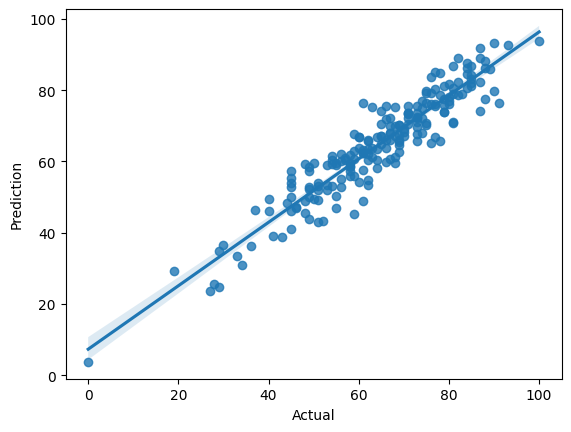

In [14]:
# assumption 1 : scatter plot for actual and prediction should be linear

sns.regplot(x = y_test, y = y_pred)

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

#### <font color='voilet'> Observation:
* As we can see plot is linear so model is performing better i.e prediction done by model are better.

---